In [0]:
%matplotlib inline
import statistics 
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from scipy.stats import beta
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import ttest_1samp
#from IPython.core.pylabtools import figsize
import scipy.stats as stats
import matplotlib.animation as animation
import seaborn as sns
import pandas.testing as tm
from numpy.random import seed

## Teorema do limite central
Uma das teorias mais importantes, na qual se baseia o intervalo de confiança, é do *Teorema do Limite Central*. Diz o teorema que **para grandes amostras, a distribuição amostral da média pode ser bastante aproximada por uma distribuição normal, centrada na média da população e com variância igual a (variância da população / número de elementos da amostra).** 
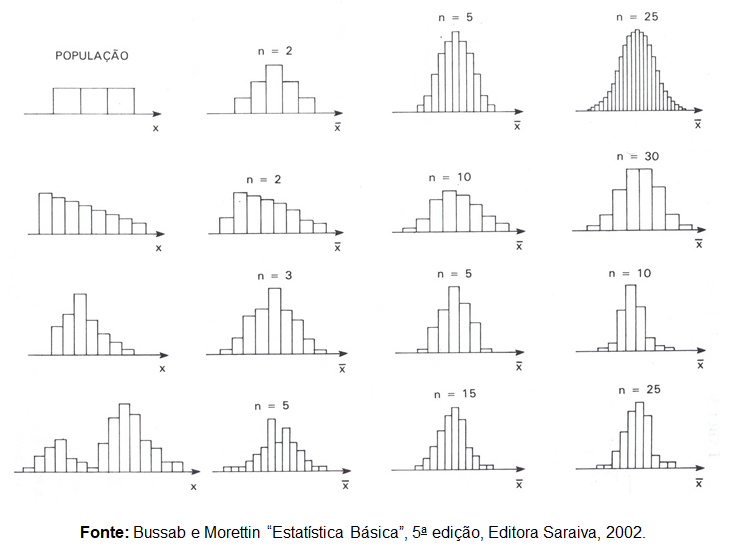


Vejam os três exemplos a seguir, cujos resultados foram apresentados nos slides, na aula teórica. O primeiro refere-se a uma população inicialmente normal, e os outros dois referem-se a uma população uniforme e exponencial. 

O valor experimental do desvio padrão para amostra de tamanho 50 é:2.809
O valor teórico do desvio padrão para amostra de tamanho 50 é:2.786


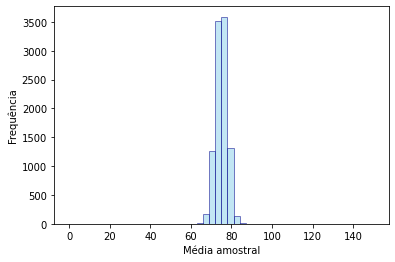

In [2]:
#Este é o primeiro exemplo da nossa aula teórica. Mude o tamanho da amostra e veja as consequências na figura e no valor do desvio
mu, sigma = 75, 19.7 
amostra = 50 
evento = np.random.normal(mu,sigma,size=(10000,amostra))
ax = sns.distplot(np.mean(evento, axis = 1),color='skyblue',kde=False,
                  hist_kws={"range":(0,150),'lw':1, 'edgecolor': 'darkblue','color':'skyblue','alpha':0.5})
ax.set(xlabel='Média amostral', ylabel='Frequência')
print('O valor experimental do desvio padrão para amostra de tamanho {:d} é:{:5.3f}'.format(amostra,np.std(np.mean(evento, axis = 1))))
print('O valor teórico do desvio padrão para amostra de tamanho {:d} é:{:5.3f}'.format(amostra,sigma/np.sqrt(amostra)))

Distribuição Uniforme: O valor experimental do desvio padrão para amostra de tamanho 5 é:0.125
Distribuição Exponencial: O valor experimental do desvio padrão para amostra de tamanho 50 é:0.141


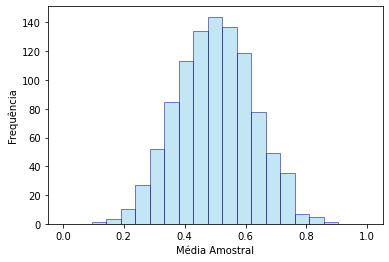

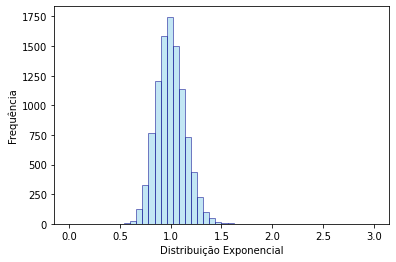

In [3]:
#Agora veremos o comportamento de população uniforme e exponencial - T.L.C.
#Distribuição Uniforme
amostra = 5 
plt.figure(1)
evento1 = np.random.uniform(size=(1000,amostra))
ax = sns.distplot(np.mean(evento1, axis = 1),color='skyblue',kde=False,
                  hist_kws={"range":(0,1),'lw':1, 'edgecolor': 'darkblue','color':'skyblue','alpha':0.5})
ax.set(xlabel='Média Amostral', ylabel='Frequência')
print('Distribuição Uniforme: O valor experimental do desvio padrão para amostra de tamanho {:d} é:{:5.3f}'.format(amostra,np.std(np.mean(evento1, axis = 1))))
#Distribuição Exponencial
amostra = 50 
plt.figure(2)
evento2 = np.random.exponential(size=(10000,amostra))
ax2 = sns.distplot(np.mean(evento2, axis = 1),color='skyblue',kde=False,
                  hist_kws={"range":(0,3),'lw':1, 'edgecolor': 'darkblue','color':'skyblue','alpha':0.5})
ax2.set(xlabel='Distribuição Exponencial', ylabel='Frequência')
print('Distribuição Exponencial: O valor experimental do desvio padrão para amostra de tamanho {:d} é:{:5.3f}'.format(amostra,np.std(np.mean(evento2, axis = 1))))

## Exemplo: peso

Para a população média de homens brasileiros. 

1.   Gere um conjunto de 50 valores aleatórios de peso masculino, entre 60-90Kg;
1.   Crie um conjunto de 1000 médias de 50 amostras de pesos. Calcule a média e o desvio padrão.
2.   Aumente e diminua o tamanho da amostra e tire suas conclusões.


Você deve concluir que, apesar de nossa amostra estar distribuída aleatoriamente entre 60 e 90, a média das médias tem uma distribuição normal. Para maiores amostras, o desvio padrão deve diminuir, e para amostras menores, deve aumentar.

[66 79 88 74 70 67 88 80 66 85 78 82 70 70 83 80 63 67 83 62 81 80 61 83
 71 89 65 61 87 80 60 71 85 81 88 71 84 76 86 86 69 87 87 75 74 89 89 74
 89 78]
O peso médio dos homens é de 77.16 kg


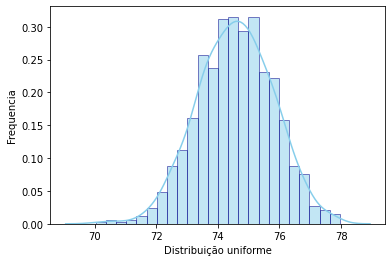

A média das médias das amostras é 74.5735


In [4]:
# seed
seed(42)
# gerando uma amostra de pesos masculinos
#Lembre-se que randit gera números aleatórios. No caso, 50 números entre 60-90
weights = np.random.randint(60, 90, 50)  
print(weights)
print('O peso médio dos homens é de {} kg'.format(np.mean(weights)))
amostra = 50
# calculando a média de peso de 50 homens 1000 vezes e calculando a média
means = [np.mean(np.random.randint(60, 90, size=(1000,amostra)), axis = 1)]
# plotando a distribuição das médias 
ax = sns.distplot(means,
                  color='skyblue',
                  hist_kws={"lw":1, "edgecolor": 'darkblue', 
                                    "color":'skyblue',"alpha":0.5}
                  )
ax.set(xlabel='Distribuição uniforme', ylabel='Frequencia')

#plt.hist(means)
plt.show()
print('A média das médias das amostras é {}'.format(np.mean(means)))

## Exemplo: altura
A variável aleatória altura da população, $x$, tem distribuição normal, com média $160$ e desvio padrão $10$.

População $N(160;10^2)$.

1.   Qual a $P(155 < x < 170)$?
2.   Se  $x$ é a média de uma amostra de 5 elementos retirados desta população, calcule a probabilidade desta estar entre 155 e 170. 
1.   Desenho os gráficos das distribuições.


A probabilidade da altura estar entre 155 e 170cm é: 0.533
A probabilidade da média de 5 alturas estar entre 155 e 170cm é: 0.856


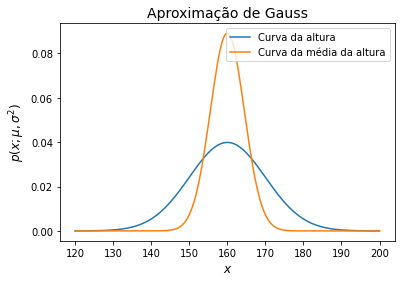

In [5]:
mu=160
desv=10
#Item 01
prob = norm.cdf(170, loc=mu, scale=desv)-norm.cdf(155, loc=mu, scale=desv)
print('A probabilidade da altura estar entre 155 e 170cm é: {:05.3f}'.format(prob))
#Item 02
n_am = 5
desv2=desv/np.sqrt(n_am)
prob = norm.cdf(170, loc=mu, scale=desv2)-norm.cdf(155, loc=mu, scale=desv2)
print('A probabilidade da média de {:d} alturas estar entre 155 e 170cm é: {:05.3f}'.format(n_am,prob))
#Item 03
x = np.linspace(120, 200, 200)
g = norm.pdf(x, loc=mu, scale=desv)
plt.plot(x, g, label='Curva da altura')
g = norm.pdf(x, loc=mu, scale=desv2)
plt.plot(x, g, label='Curva da média da altura')

plt.title("Aproximação de Gauss", fontsize=14)
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$p(x;\mu,\sigma^2)$' , fontsize=12)
plt.legend()
#plt.ylim([0, 1])
#plt.xlim([0, 1])
plt.show()


# Exemplo: nível de bilirrubina
O nível de bilirrubina sérico em crianças nascidas com peso menor que 750g tem distribuição Normal com média $\mu = 8.5 mg/dl$ e desvio-padrão $\sigma = 3.5  mg/dl$.
Qual é a probabilidade de que a média amostral, para uma amostra de $16$ crianças, esteja entre $6.79$ e $10.22  mg/dl$? 

In [6]:
n_amostra = 16 
mu,sigma = 8.5,3.5
prob= norm.cdf(10.22,mu,sigma/np.sqrt(n_amostra))-norm.cdf(6.79,mu,sigma/np.sqrt(n_amostra))
print('A probabilidade é de {:1.3f}'.format(prob))

A probabilidade é de 0.950


## Relação entre distribuição gaussiana e binomial
A distribuição gaussiana pode ser derivada da Binomial (ou Poisson) assumindo:
1.   $p$ é finito
2.   $n$ é muito grande

Um exemplo que ilustra a pequena diferença entre as duas distribuições nas condições acima é o jogo da moeda, supondo $n=10000$ e $p=0.5$.

Nesse caso, usa-se a definição de média e desvio padrão binomial,
\begin{equation}
\mu=np=5000 \qquad \sigma=\sqrt{np(1-p)}=50
\end{equation}

A probabilidade de estar dentro de $\pm 1\sigma$ é,

*   Para uma distribuição binomial:

\begin{equation}
P=\sum_{m=5000-50}^{5000+50} \frac{10^4!}{\left(10^4-m\right)!m!}0.5^m 0.5^{10^4-m}=0.69
\end{equation}

*   Para uma distribuição gaussiana:
\begin{equation}
p(5000-50 < x < 5000+50)=\frac{1}{50 \sqrt{2\pi}}\int_{5000-50}^{5000+50} e^{-\frac{(x-5000)^2}{2 \times 50^2}}=0.69
\end{equation}

Ambas as distribuições dão praticamente a mesma probabilidade! Veja a baixo a simulação numérica...



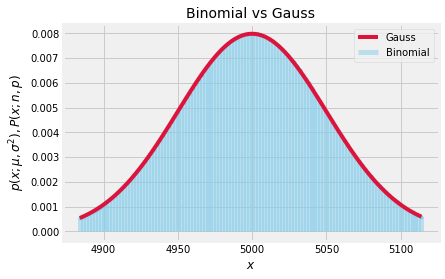

In [0]:
n_tr=10000
p=0.5
x = np.arange(binom.ppf(0.01, n_tr, p),binom.ppf(0.99, n_tr, p),2)
rv = binom.pmf(x,n_tr, p)

fig, ax = plt.subplots(1, 1)
ax.plot(x, rv, 'o', color = 'skyblue', ms=3)
ax.vlines(x, 0, rv, colors='skyblue', lw=5, alpha=0.5, label='Binomial')
mu=n_tr*p
desv = np.sqrt(n_tr*p*(1-p))

g = norm.pdf(x, loc=mu, scale=desv)
plt.plot(x, g, color = 'crimson', label = 'Gauss')
plt.title("Binomial vs Gauss", fontsize=14)
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$p(x;\mu,\sigma^2), P(x;n,p)$' , fontsize=12)
plt.legend()
plt.show()


#CTR
CTR é a abreviação do inglês para *click-through rate*, ou, *taxa de cliques*. É a proporção entre o número de usuários que clicam em um link específico pelo o número total de usuários que visualizam uma página, email ou anúncio. É comumente usado para medir o sucesso de uma campanha de publicidade online para um site específico, bem como a eficácia das campanhas por email.

Veja a figura abaixo, extraída deste [link](towardsdatascience.com/demystifying-hypothesis-testing-with-simple-python-examples-4997ad3c5294), que mostra que o Netflix mostra o mesmo programa com design diferente, para diferentes grupos de usuários. As respostas dos usuários (CTR) são registradas e analisadas. Para isso, eles usam o usando o bom e velho teste de hipóteses, que aprenderemos a seguir.

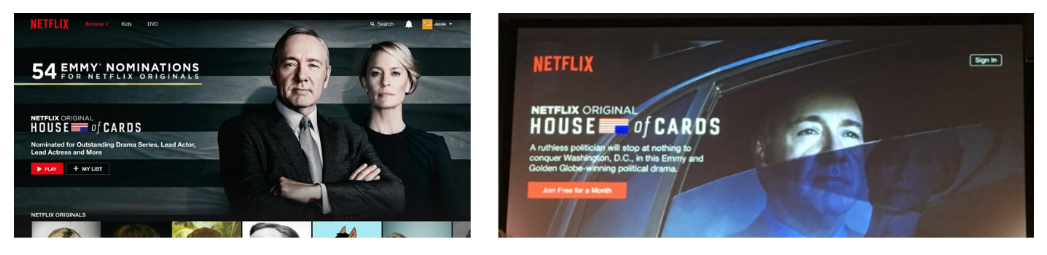


Nesse exemplo, vamos supor que a taxa de sucesso, ou `CTR = 0.5` (mas não sabemos disso) e que o tamanho total de nossa amostra seja de `n=500` visualizações. A medida que aumentamos o tamanho de nossa amostra aleatória, como se comporta nossa amostra, supondo que siga uma curva de Gauss?

 **Importante:** 
 
Veja que no item anterior, decidimos usar a definição de média e variância da binomial. Porém, para comparar amostras de tamanhos diferentes, obviamente precisamos usar a mesma escala. A padronização mais simples é adotar uma escala probabilística, ou seja, onde $p = 0,..., 1$. Para fazer isso, dividimos a fórmula da variância por $n$ - lembre-se que temos que considerar a divisão por $n$ novamente do fato da análise estar baseada em uma amostra de tamanho $n$. Divide-se, portanto, a variância por $n^2$. O desvio padrão de uma distribuição binomial em uma escala probabilística é dada, portanto, por,

\begin{equation}
\sigma=\sqrt{\frac{p(1-p)}{n}}
\end{equation}

A fórmula tem as seguintes propriedades:

*   Para um valor constante $n > 1$, a medida que $p$ tende a zero, $p(1-p)$ também tenderá a $0$. (Considere: se uma moeda tiver chance zero de dar cara, sempre dará coroa!)
*   Para um valor constante $p>0$, a medida que $n$ aumenta, $p(1-p)/n$ diminui. (Obviamente, quanto maior o tamanho da amostra menor a variância da média das médias!)


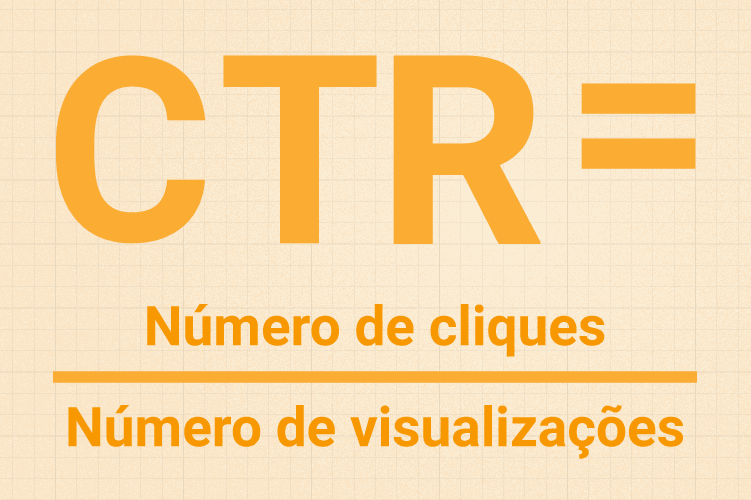

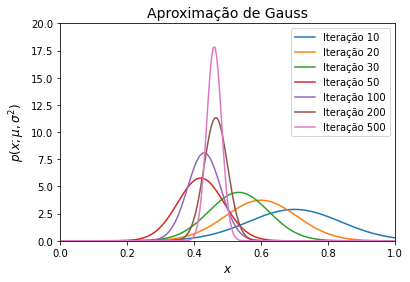

In [7]:
N_tr = 501 
CTR = 0.5
plot_indices = (10, 20, 30, 50, 100, 200, 500)
data = np.empty(N_tr)
for i in range(N_tr):
  x = 1 if np.random.random() < CTR else 0
  data[i] = x
  if i in plot_indices:
    # estimativa de máxima verossimilhança para CTR
    p = data[:i].mean()
    n = i + 1 # Número de amostras coletadas até agora
    std = np.sqrt(p*(1-p)/n)
    # Gauss
    x = np.linspace(0, 1, 200)
    g = norm.pdf(x, loc=p, scale=std)
    plt.plot(x, g, label='Iteração {0}'.format(i))
plt.title("Aproximação de Gauss", fontsize=14)
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$p(x;\mu,\sigma^2)$' , fontsize=12)
plt.legend()
plt.ylim([0, 20])
plt.xlim([0, 1])
plt.show()

## Intervalo de confiança

Utiliza-se como estimador da média da população a média amostral,
\begin{equation}
\bar{x}=\frac{\sum_{i=1}^n x_i}{n}
\end{equation}

A variância da população é estimada com o uso do seguinte estimador:
\begin{equation}
s^2=\frac{\sum_{i=1}^n \left(x_i - \bar{x}\right)^2}{n}
\end{equation}

A variância da amostra calculada com $n$ no denominador tende a subestimar o valor da variância real $\sigma^2$.

Essas formulações são para obtenção de estimativas pontuais de parâmetros de uma população.

Entretanto, se a determinação de um dado parâmetro é a meta final do estudo estatístico, a estimação por ponto é, em geral, insuficiente, pois a probabilidade de que a estimativa adotada venha a coincidir com o verdadeiro valor do parâmetro é, usualmente, nula ou praticamente nula.

Isso decorre do fato dos estimadores serem variáveis aleatórias, muitas vezes contínuas. Portanto, é praticamente certo que estaremos cometendo um erro de estimação.

Para minimizar estas incertezas, pode-se construir intervalos uma probabilidade conhecida  de conter o verdadeiro valor do parâmetro. A esse intervalo damos o nome de *Intervalo de Confiança*.

O intervalo de confiança é calculado da seguinte maneira:
\begin{equation}
P\left( \bar{x}-e_0 < \mu < \bar{x}+e_0 \right) = 1 - \alpha
\end{equation}
onde,
\begin{equation}
e_0 = z_{\alpha/2}\frac{\sigma}{\sqrt{n}}
\end{equation}

onde $z_{\alpha/2}$ depende do nível de confiança de seu intervalo (veja tabela abaixo). O código abaixo resulta no valor de $z_{\alpha/2=2.5}$. Entender o código significa que você entendeu o conceito do intervalo de confiança.


```
alpha=5./100.
z= norm.ppf((1-alpha)+alpha/2)
```



Confiança | $z_{\alpha/2}$
--- | ---
$90\%$ | 1.645
$95\%$ | 1.960
$97.5\%$ | 2.241
$99\%$ | 2.576
$99.5\%$ | 2.807
$99.9\%$ | 3.290

A curva $t-student$ é similar à curva normal, porém,
*   tem caudas mais densas do que a distribuição normal; 
*   valores extremos são mais prováveis de ocorrer;
*   reflete a variabilidade extra introduzida pelo estimador da variância $s_x^2$. 

Em python, pode-se calcular diretamente o intervalo de confiança a partir da curva t-student,


```
from scipy.stats import t
print(t.interval(0.95, 100, loc=0, scale=1))  # IC de 95%, n=100 
print(t.interval(0.99, 100, loc=0, scale=1))  # IC de 99%, n=100
```

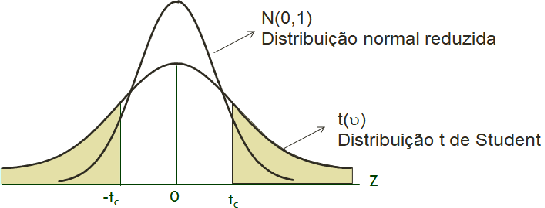

In [10]:
#Valores da tabela
alpha=5./100.
z= norm.ppf((1-alpha)+alpha/2)
print(z)

1.959963984540054


### Exemplo 01
Sabe-se que 13 de 147 professores sabem a linguagem de sinais. Encontre a margem de erro para um IC de 90% para a proporção de professores que sabem linguagem de sinais.

In [11]:
alpha=10./100.
z= norm.ppf((1-alpha)+alpha/2)
n=147.
p=13./n
std = np.sqrt(p*(1-p)/n)
e0=z*np.sqrt(std/n)
print('Limite inferior = {:6.3f}'.format(p-e0))
print('Limite superior = {:6.3f}'.format(p+e0))

Limite inferior =  0.068
Limite superior =  0.109


Considerando-se que uma amostra de 4 elementos extraída de uma população com distribuição normal forneceu média igual a $8,20$ e desvio padrão igual a $0,40$, construir um intervalo de confiança com grau de confiança de $99\%$ para a média desta população. E se os valores fossem obtidos de uma amostra de 100 elementos? Qual a diferença no intervalo se usassemos a curva normal ao invés da curva t-student?


In [62]:
from scipy.stats import t
lower,upper=t.interval(0.99, 4, loc=8.2, scale=0.4)# IC 99% n=4
print('Intervalo para amostra de 4 elementos: {:6.3f},{:6.3f}'.format(lower,upper))  
lower,upper=t.interval(0.99, 100, loc=8.2, scale=0.4)# IC 99% n=100
print('Intervalo para amostra de 100 elementos: {:6.3f},{:6.3f}'.format(lower,upper)) 
mu=8.2
sdv=0.4
n=4
alpha=1./100.
z= norm.ppf((1-alpha)+alpha/2)
e0=z*sdv/np.sqrt(n) 
print('Intervalo para amostra com curva z: {:6.3f},{:6.3f}'.format(mu-e0,mu+e0)) 

Intervalo para amostra de 4 elementos:  6.358,10.042
Intervalo para amostra de 100 elementos:  7.150, 9.250
Intervalo para amostra com curva z:  7.685, 8.715


## Bootstrap Samples
*Bootstrap samples* é o nome conhecido de uma técnica de *reamostragem*.  Isto é, uma amostra do nosso conjunto de dados, **com reposição**, onde o tamanho da amostra é igual ao tamanho do conjunto de dados.

Essa é uma maneira de quantificar os efeitos da variação da amostragem quando você tem apenas uma amostra. Além disso, e se quisermos não apenas uma estimativa única do parâmetro populacional desconhecido, mas também uma gama de valores altamente plausíveis? Uma das aplicações do método bootstrap é obter *intervalos de confiança que são bastante confiáveis*.  

Vamos aplicar os dois métodos de calcular intervalo de confiança em uma reamostragem: método clássico que aprendemos e percentil (usado quando não temos certeza que o comportamento dos dados é nomal).

Usaremos o seguinte exemplo:

Conduziu-se um experimento para investigar a capacidade de enchimento de um equipamento de embalagem em uma vinícola em Newberg, Oregon. Vinte garrafas de Pinot Gris foram selecionadas aleatoriamente e o volume de enchimento (em ml) foi medido. Suponha que o volume de enchimento tenha distribuição normal. 

Os dados são os seguintes: 

753; 751; 752; 753; 753; 753; 752; 753; 754; 754; 752; 752; 752; 750; 753; 755; 753; 756; 751; 750.

In [59]:
# bootstrap confidence intervals
# generate dataset
dataset = np.array([753,751,752,753,753,753,752,753,754,754,752,752,752,750,753,755,753,756,751,750])
print('Média = {:06.2f}'.format(statistics.mean(dataset)))
mu=np.mean(dataset)
dsv=np.std(dataset,ddof=1)
lower_class,upper_class=t.interval(0.95, 20, loc=mu, scale=dsv)
alpha=5./100.
# bootstrap
scores = list()
scores.append(mu)
bootstrap = [20, 50, 100, 250, 500, 750, 1000, 2000]
method = 'z'
d = []
for i in bootstrap:
  # bootstrap sample
  indices = np.random.randint(0, 20, i)
  sample = dataset[indices]
  mu=np.mean(sample)
  dsv=np.std(sample,ddof=1)
  scores.append(mu)
  if method == 't':
    test_stat = t.ppf((1-alpha)+alpha/2, i+1)
  elif method == 'z':
    test_stat = norm.ppf((1-alpha)+alpha/2)
  lower_t = mu - test_stat * dsv/np.sqrt(i+1)
  upper_t = mu + test_stat * dsv/np.sqrt(i+1)
  # IC de 95% (100 - alpha)
  # Percentil inferior (i.é, 2.5)
  lower_p = alpha*100./2.0
  lower_perc = np.percentile(scores, lower_p)
  # Percentil superior (i.é, 97.5)
  upper_p = (100 - alpha*100.) + (alpha*100. / 2.0)
  upper_perc = np.percentile(scores, upper_p)
  if i > 20:
    d.append(
        {
            'Tamanho': i,
            'Média':mu,
            'Classico': ['---','---'],
            'Bootstrap t': ['{:,.2f},{:,.2f}'.format(lower_t,upper_t)],
            'Bootstrap Percentil': ['{:,.2f},{:,.2f}'.format(lower_perc,upper_perc)]
         }
         )
  else:
    d.append(
        {
            'Tamanho': i,
            'Média':mu,
            'Classico': ['{:,.2f},{:,.2f}'.format(lower_class,upper_class)],
            'Bootstrap t': ['{:,.2f},{:,.2f}'.format(lower_t,upper_t)],
            'Bootstrap Percentil': ['{:,.2f},{:,.2f}'.format(lower_perc,upper_perc)]
         }
         )
pd.set_option('precision', 3)
pd.DataFrame(d)

Média = 752.00


,Tamanho,Média,Classico,Bootstrap t,Bootstrap Percentil
0,20,753.050,"[749.47,755.73]","[752.25,753.85]","[752.61,753.04]"
1,50,752.280,"[---, ---]","[751.87,752.69]","[752.30,753.03]"
2,100,752.720,"[---, ---]","[752.41,753.03]","[752.30,753.03]"
3,250,752.416,"[---, ---]","[752.22,752.61]","[752.29,753.02]"
4,500,752.612,"[---, ---]","[752.49,752.74]","[752.30,753.01]"
5,750,752.547,"[---, ---]","[752.44,752.65]","[752.30,753.00]"
6,1000,752.644,"[---, ---]","[752.55,752.73]","[752.30,752.99]"
7,2000,752.644,"[---, ---]","[752.58,752.71]","[752.31,752.98]"


## Teste de hipóteses
*O objetivo do teste estatístico de hipóteses é fornecer uma metodologia que nos permita verificar se os dados amostrais trazem evidências que apóiem ou não uma hipótese estatística formulada.* (Bussab e Morettin, 5ª ed.)

Para execução do teste de hipótese de acordo com a estatística frequentista, **supõe-se que exista uma hipótese sobre o parâmetro da população**, a qual será considerada válida até que se prove o contrário.
A hipótese será testada com base em resultados amostrais, sendo aceita ou rejeitada.

### Exemplo dos descendentes da ilha
Sempre se considerou que os antigos  habitantes de uma ilha eram descendentes da civilização A, que tinha altura média de 155 cm com desvio padrão de 20 cm. Porém, estudos mais recentes demonstram que, talvez, os habitantes dessa ilha eram descendentes da civilização B, com altura média de 145 cm e desvio padrão de 12 cm. 

Tem-se, de uma amostra de fósseis de 25 ex-moradores adultos da ilha, o valor média da altura. Como podemos, a partir desse resultado, definir se são descendentes da civilização A ou B????

Abaixo, as análises feitas em aula do exemplo.


In [18]:
#Probabilidade de erro tipo I - Rejeitar H0/H0 é verdadeiro
n_amostra = 25.
mu,sigma = 155.,20.
g = norm.cdf(150., loc=mu, scale=sigma/np.sqrt(n_amostra))
print('O erro tipo I vale {:.3%}'.format(g))

#Probabilidade de erro tipo II - Aceitar H0/H0 é falso
n_amostra = 25.
mu,sigma = 145.,12.
g = norm.cdf(150., loc=mu, scale=sigma/np.sqrt(n_amostra))
print('O erro tipo II vale {:.3%}'.format(1.-g))

O erro tipo I vale 10.565%
O erro tipo II vale 1.861%


In [19]:
#Probabilidade de erro tipo I - Rejeitar H0/H0 é verdadeiro de 5%
n_amostra = 25.
mu,sigma = 155.,20.
g = norm.ppf(0.05, loc=mu, scale=sigma/np.sqrt(n_amostra))
print('O valor crítico é {:7.3f}'.format(g))

#Probabilidade de erro tipo II - Aceitar H0/H0 é falso
n_amostra = 25.
mu,sigma = 145.,12
g2 = norm.cdf(g, loc=mu, scale=sigma/np.sqrt(n_amostra))
print('O erro tipo II vale {:.3%}'.format(1.-g2))

O valor crítico é 148.421
O erro tipo II vale 7.704%


Mas, afinal, supondo $\bar{x}=148$, aceitamos ou rejeitamos $H_0$???

In [20]:
mu,sigma = 155.,20.
n_amostra = 25
xbar = 148.
estatistica = (xbar-mu)/(sigma/np.sqrt(n_amostra))
print('A estatística do teste é {:7.3f}'.format(estatistica))
p_val = (stats.t.cdf(estatistica,24))
print('O valor p é {:7.3f}'.format(p_val))

A estatística do teste é  -1.750
O valor p é   0.046


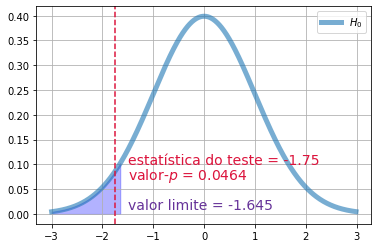

In [23]:
#Plot da zona de rejeição e valor-p em coordenada z, para você visualizar as áreas
intervalo = np.arange(-3,3, 0.01)
intervalo1 = np.arange(-3,norm.ppf(0.05), 0.01)
fig, (ax) = plt.subplots()

#
sns.lineplot(intervalo, norm.pdf(intervalo), lw=5, alpha=0.6, label='$H_0$', ax=ax)
ax.fill_between(intervalo1, norm.pdf(intervalo1), 0, alpha=0.3, color='b')
plt.axvline(x=estatistica, ymin=0, ymax=1, color='crimson', linestyle='--')
ax.text(-1.5, 0.1, 'estatística do teste = {:2.3}'.format(estatistica), color='crimson', fontsize=14)

ax.text(-1.5, 0.07, 'valor-$p$ = {:2.3}'.format(p_val), color='crimson', fontsize=14)
ax.text(-1.5, 0.01, 'valor limite = {:3.4}'.format(norm.ppf(0.05)), color='rebeccapurple', fontsize=14)
plt.grid()

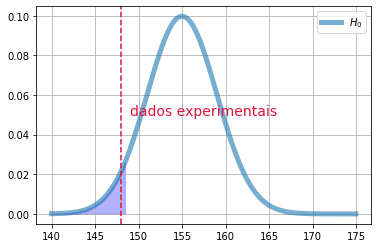

In [25]:
#Plot da zona de rejeição e valor-p em coordenada x
intervalo = np.arange(140, 175, 0.01)
intervalo1 = np.arange(140,norm.ppf(0.05, loc=mu, scale=sigma/np.sqrt(n_amostra)), 0.01)
gauss1 = norm.pdf(intervalo,loc=mu,scale=sigma/np.sqrt(n_amostra))
fig, (ax) = plt.subplots()
#
sns.lineplot(intervalo, gauss1, lw=5, alpha=0.6, label='$H_0$', ax=ax)
ax.fill_between(intervalo1, norm.pdf(intervalo1,loc=mu, scale=sigma/np.sqrt(n_amostra)), 0, alpha=0.3, color='b')
plt.axvline(x=estatistica*sigma/np.sqrt(n_amostra)+mu, ymin=0, ymax=1, color='crimson', linestyle='--')
ax.text(149, 0.05, 'dados experimentais', color='crimson', fontsize=14)
plt.grid()

### Exercício para você treinar sobre erros tipo I e II
Fazendo o teste $H_0: \mu = 1150 (\sigma = 150)$ contra $H_1: \mu = 1200 (\sigma = 200)$ e com $n = 100$, estabeleceu-se a seguinte região crítica: $RC = [1170, \infty)$.

*   Qual a probabilidade $\alpha$ de rejeitar $H_0$ quando verdadeira?
*   Qual a probabilidade $\beta$ de aceitar $H_0$ quando $H_1$ é verdadeira?





In [0]:
#Probabilidade de erro tipo I - Rejeitar H0/H0 é verdadeiro
n_amostra = 100
mu,sigma = 1150,150
g = norm.cdf(1170, loc=mu, scale=sigma/np.sqrt(n_amostra))
print('O erro tipo I vale {:.3%}'.format(1-g))

#Probabilidade de erro tipo I - Rejeitar H0/H0 é verdadeiro
mu,sigma = 1200,200
g = norm.cdf(1170, loc=mu, scale=sigma/np.sqrt(n_amostra))
print('O erro tipo II vale {:.3%}'.format(g))

O erro tipo I vale 9.121%
O erro tipo II vale 6.681%


### Teste de Hipótese Exemplo 01
Em uma amostra de 14 pais de crianças entre 6-8 anos, você quer chegar se a média de idade é 30 anos ou não, para um $\alpha=0.5=50\%$.

In [26]:
idades = np.array([32., 34., 29., 29., 22., 39., 38., 37., 38., 36., 30., 26., 22., 22.])
mu = 30
print(idades)
idade_media = np.mean(idades)
idade_std = np.std(idades,ddof=1)
#
estat = np.absolute((mu-idade_media)/(idade_std/np.sqrt(len(idades))))
print('Média, desvio padrão e valor-t são: {:2.3},{:2.3},{:2.3}'.format(idade_media,idade_std,estat))
tset, pval = ttest_1samp(idades, 30)
print('Valor-t calculado na função: {:2.3}'.format(tset))
print('Valor-p {:3.3f} a ser comparado com o nível de significância'.format(pval))
if pval < 0.05:    # alpha 0.05 or 5%
   print('Rejeita-se a hipótese nula')
else:
  print('Aceita-se a hipótese nula')

[32. 34. 29. 29. 22. 39. 38. 37. 38. 36. 30. 26. 22. 22.]
Média, desvio padrão e valor-t são: 31.0,6.26,0.597
Valor-t calculado na função: 0.597
Valor-p 0.561 a ser comparado com o nível de significância
Aceita-se a hipótese nula


### Teste de Hipótese Exemplo 02
Em indivíduos sadios, o consumo real de oxigênio distribui-se normalmente, em torno de $12$ $cm^3/min$. Deseja-se investigar, com base em cinco indivíduos portadores de certa moléstia, se esta tem influência no consumo médio de oxigênio. Os consumos medidos para cinco pacientes foram: 

$14,4 ; 12,9 ; 15,0 ; 13,7 ; 13,5$

Qual a conclusão ao nível de 1% de significância?


In [27]:
consumos = np.array([14.4 , 12.9 , 15.0 , 13.7 , 13.5])
mu = 12
consumo_media = np.mean(consumos)
consumo_std = np.std(consumos,ddof=1)
estat = np.absolute((mu-consumo_media)/(consumo_std/np.sqrt(len(consumos))))
tset, pval = ttest_1samp(consumos, 12)

print('Valor p: {:3.3f}'.format(pval))
if pval < 0.01:    # alpha 0.01 or 1%
   print('Rejeita-se a hipótese nula')
else:
  print('Aceita-se a hipótese nula')

Valor p: 0.006
Rejeita-se a hipótese nula


### Teste de hipótese t-pareado Exemplo 01
Uma companhia farmacêutica está interessada em investigar uma nova droga, que talvez tenha a propriedade de baixar a taxa de colesterol (TC). As
determinações foram feitas em mg/100ml antes e depois
de o tratamento ser ministrado em cada indivíduo.

TC | 1 | 2 | 3 | 4 | 5 | 6
--- | --- | --- | --- | --- | --- | ---
TC antes | 217 | 252| 229 | 200| 209| 213
TC depois | 209 | 241| 230| 208| 206| 211

População 1 (TC sem tratamento): a taxa média é $\mu_1$
(desconhecida); amostra (6 pacientes): taxa média de colesterol antes é $\bar{x}_1= 220.0$


População 2 (TC com tratamento): a taxa média é $\mu_2$
(desconhecida); amostra (6 pacientes): taxa média de colesterol depois é $\bar{x}_2= 217.5$.


In [28]:
print(stats.t.interval(0.9, 5, loc=0, scale=1))  # IC de 95%, n-1=5 
TC_antes = [217,252,229,200,209,213]
TC_depois = [209,241,230,208,206,211]
print(np.mean(TC_antes))
print(np.mean(TC_depois))
stat, p = stats.ttest_rel(TC_antes, TC_depois)
print('stat=%.4f, p=%.4f' % (stat, p))
print((1-stats.t.cdf(stat,5))*2)
if p > 0.10:
	print('A intervenção não produz efeito')
else:
	print('A intervenção produz algum efeito')

(-2.015048372669158, 2.015048372669157)
220.0
217.5
stat=0.9119, p=0.4037
0.4036647000393654
A intervenção não produz efeito


Do teste anterior conclui-se que não há evidência experimental para afirmarmos que a nova droga diminui a taxa de colesterol em indivíduos que a utilizam.

Fim